# Metodi del minimo $\chi^2$ e dei minimi quadrati

Immaginiamo di avere diverse misure di quantità $y$ il cui valore dipende da un'altra variabile $x$ secondo una legge che ha parametri ingnoti che vogliamo misurare:

$y = f(x;\theta_1, \cdots, \theta_m)$


In realtà, noi misuriamo $n$ quantità $y_i$ che corrispondono a diversi valori $x_i$ $(i=1,\cdots,n)$ e che sono soggette a fluttuazioni statistiche. Assumiamo che $f(x_i;\theta_1, \cdots, \theta_m)$ sia il valor medio di $y_i$, e che $y_i$ sia distribuito intorno a $f(x_i;\theta_1, \cdots, \theta_m)$ secondo una distribuzione gaussiana con deviazione standard $\sigma_i$.

La funzione di verosimiglianza è data dal prodotto di $n$ funzioni gaussiane:

$\displaystyle p(y_1, \cdots, y_n; \theta_1,\cdots,\theta_m) = \prod_{i=1}^n
\frac{1}{\sqrt{2\pi\sigma_i^2}}\exp\left[
-\frac{\left(y_i - f(x_i;\theta_1,\cdots,\theta_m)\right)^2}{2\sigma_i^2}
\right]
$

Anziché massimizzare $p(y_1, \cdots, y_n; \theta_1,\cdots,\theta_m)$, come già visto, è più semplice minimizzare $-2\log p(y_1, \cdots, y_n; \theta_1,\cdots,\theta_m)$:


$\displaystyle  -2\log p(y_1, \cdots, y_n; \theta_1,\cdots,\theta_m) = 
\sum_{i=1}^n\frac{\left(y_i - f(x_i;\theta_1,\cdots,\theta_m)\right)^2}{\sigma_i^2}
+\sum_{i=1}^n\log 2\pi\sigma_i^2
$

L'ultimo termine non dipende dai parametri $\theta_1,\cdots,\theta_m$, per cui se lo eliminiamo il minimio non cambia.

Possiamo quindi minimizzare la quantità:

$\displaystyle \chi^2(\theta_1,\cdots,\theta_m) = \sum_{i=1}^n\frac{\left(y_i - f(x_i;\theta_1,\cdots,\theta_m)\right)^2}{\sigma_i^2}
$

I termini al numeratore, valutati per i valori dei parametri $\hat{\theta}_1,\cdots,\hat{\theta}_m$ si chiamano anche *residui*, e sono definiti come:

$r_i = y_i - \hat{y}_i = y_i -f(x_i, \hat{\theta}_1,\cdots,\hat{\theta}_m)$

## Minimo $\chi^2$ e misure correlate

Bisogna fare attenzione che la formula riportata sopra per la stima col metodo del minimo $\chi^2$ vale solo se le misure $y_1, \cdots, y_n$ sono tra di loro *indipendenti*. Se ci fosse correlazione, la formula può essere modificata introducendo i termini di correlazione e diventerebbe più complessa da trattare.

<span style="color:red">Come corollario di questa osservazione, va notato che la formula di cui sopra **non può essere usata per il fit di una distribuzione cumulativa di conteggi**, dove ciascun valore $y_i$ dipende dai precedenti $y_1, \cdots, y_{i-1}$.</span>

## Metodo dei minimi quadrati

Se assumiamo che le deviazioni standard $\sigma_i$ siano tutte uguali, basta minimizzare la somma dei quadrati delle deviazioni:

$\displaystyle S = \sum_{i=1}^N\left(y_i - f(x_i;\theta_1,\cdots,\theta_n)\right)^2$

Il calcolo dell'errore richiede però particolare cura, come vedremo dopo.

# Stima degli errori

Come detto altrove, la stima della matrice di covarianza si può fare come:

$\displaystyle C_{ij}^{-1} =-\frac{\partial^2 \log p(x_i,\cdots,x_n; \theta_i, \cdots, \theta_m)}{\partial\theta_i\,\partial\theta_j}
$

E, in particolare, gli errori si ottengono dagli elementi diagonali della matrice:

$\displaystyle \frac{1}{\sigma_{\hat{\theta}_i}^2} =-\frac{\partial^2 \log p(x_i,\cdots,x_n; \theta_i, \cdots, \theta_m)}{\partial\theta_i^2}
$

# Minimizzazioni numeriche

In genere le implementazioni numeriche che ricercano minimi in $m$ dimensioni partono da un insieme di **valori iniziali** e "scendono" lungo il gradiente della funzione con passi che diventano via via più piccoli man mano che il gardiente diminuisce.

È possibile che l'algoritmo scelga un **minimo locale**, per cui **la soluzione finale può dipendere dai valori iniziali** che si scelgono.

La discesa lungo il gradiente è anche un algoritmo utilizzato in applicazioni di *machine learning* dove è necessario minimizzare alcune funzioni che misurano quanto i parametri di un algoritmo sono distanti dal valore ottimale.

In alcune implementazioni, si introducono elementi casuali nell'algoritmo per favorire la convergenza.

### Approfondimenti
* [Stochastic Gradient Descent Algorithm With Python and NumPy](https://realpython.com/gradient-descent-algorithm-python/)

# Implementazione in python

La libreria ```SciPy``` fornisce la funzione [```curve_fit```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) che implementa una minimizzazione numerica. È possibile passare un vettore con gli errori oppure l'intera matrice di covarianza (```sigma```). È possibile limitare l'intervallo dei valori da determinare nella minimizzazione in intervalli prescelti.

Da notare che il numero di parametri è determinato direttamente dalla funzione.

<span style="color:blue">Nota: il calcolo dell'errore di default nella funzione ```curve_fit``` è un po' diverso, e lo vedremo più avanti. Per usare calcolare l'errore dalle derivate seconde del $\chi^2$ bisogna abilitare l'opzione ```absolute_sigma```, che di default è ```False```.</span>

Esiste anche una versione che minimizza la funzione [```least_squares```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html#scipy.optimize.least_squares) che non dà la possibilità di utilizzare errori.

<span style="color:blue">Questa non è l'implementazione più utilizzata in fisica, dove, come vedremo, è più utilizzato il pacchetto [MINUIT](https://inspirehep.net/literature/1258343) sviluppato al CERN vari decenni fa, e successivamente portata in C++ e python.</span>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

In [3]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

Di reguito generiamo, per ciascun punto $x_i$, un valore $y_i$ determinato come $f(x_i)+\delta_i$, dove $\delta_i$ è estratto casualmente secondo una distribuzione gaussiana con una certa larghezza $\sigma_i$. 

$\delta_i$ rappresenta l'errore sulla misura di $y_i$ che si somma al suo valore atteso $f(x_i)$.

Nell'esempio, useremo $\sigma_i=\sigma$ costante per tutti i bin.

<span style="color: blue">Nota: se gli errori non vengono specificati, la funzione assume $\sigma=1$. Questo potrebbe restituire una matrice di covarianza che non ha molto senso.</span>

In [4]:
xdata = np.linspace(0, 4, 51)
ptrue = [2.5, 1.3, 0.5]
y = func(xdata, *ptrue)
np.random.seed(1729)
sigma = 0.2
ynoise = sigma * np.random.normal(size=xdata.size)
ydata = y + ynoise
sigmas = np.array([sigma]*xdata.size)

fit without bounds
[2.55940852 1.3353397  0.46393166]
[[ 0.01410576  0.00593799 -0.00069167]
 [ 0.00593799  0.01761924  0.00486881]
 [-0.00069167  0.00486881  0.00257922]]
a = 2.559+/-0.119
b = 1.335+/-0.133
c = 0.464+/-0.051
fit with bounds
fit parameters:  [2.44898647 1.         0.34309967]
cov matrix: [[ 0.01164265  0.00223312 -0.00169822]
 [ 0.00223312  0.01270715  0.00638703]
 [-0.00169822  0.00638703  0.00470185]]


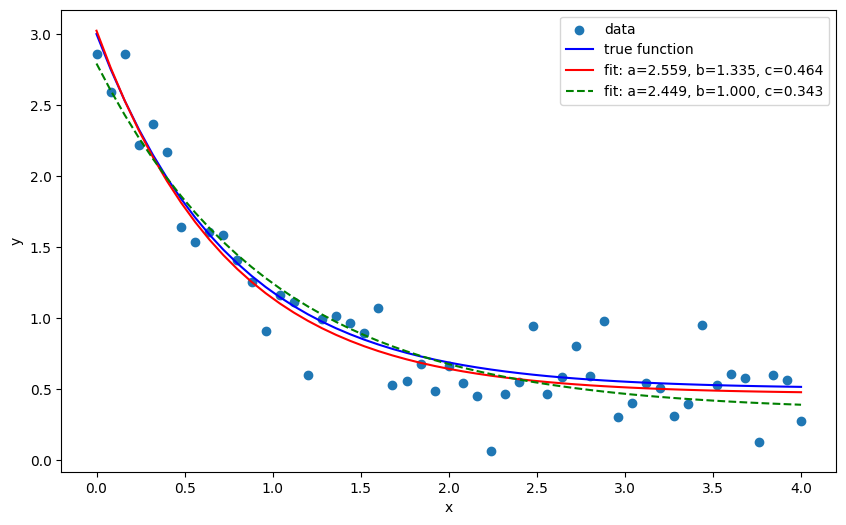

In [6]:
plt.figure(figsize=(10 ,6), dpi=100)
plt.scatter(x=xdata, y=ydata, label='data')
plt.plot(xdata, func(xdata, *ptrue), 'b-', label='true function')

popt, pcov = curve_fit(func, xdata, ydata, p0=[2, 1, 0], 
                       sigma=sigmas, absolute_sigma=True)
print('fit without bounds')
print(popt)
print(pcov)
print("a = {:.3f}+/-{:.3f}".format(popt[0],math.sqrt(pcov[0,0])))
print("b = {:.3f}+/-{:.3f}".format(popt[1],math.sqrt(pcov[1,1])))
print("c = {:.3f}+/-{:.3f}".format(popt[2],math.sqrt(pcov[2,2])))

plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a={:5.3f}, b={:5.3f}, c={:5.3f}'.format(*popt))
popt, pcov = curve_fit(func, xdata, ydata, sigma=sigmas, 
        p0=[2, 0.9, 0], bounds=([0, 0, 0], [3., 1., 0.5]), absolute_sigma=True)
print('fit with bounds')
print("fit parameters: ", popt)
print("cov matrix:", pcov)

plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Altre risorse in rete

* [LMFIT](https://lmfit.github.io/lmfit-py/): Non-Linear Least-Squares Minimization and Curve-Fitting for Python
* [iMinuit](https://iminuit.readthedocs.io/en/stable/): libreria nata al CERN negli anni '70, ancora usata in fisica delle particelle elementari. È adatta per fit complessi e può gestire un gran numero di parametri. La studieremo più in dettaglio.

# Spunti per esercizi

* Modificare l'esempio di fit presentato sopra per fare il fit di:
    * una distribuzione esponenziale di cui sia incognito il parametro $\lambda$

* Modificare l'esempio di fit presentato sopra per fare il fit di:
    * una distribuzione gaussiana dove siano incogniti i parametri $\mu$ e $\sigma$

* Provare a generare un campione con errori pari a $\sqrt{n_i}$, dove $n_i$ è il numero dei conteggi in ciascun bin, per emulare una distribuzione poissoniana. Gli errori si possono specificare come parametro della funzione ```curve_fit```: ```sigma=[s1, s1, ..., sn]```.

In [7]:
from scipy.stats import norm

In [8]:
def func(x, n, mu, sigma):
    return n/np.sqrt(2*math.pi)/sigma*np.exp(-((x-mu)/sigma)**2)

In [9]:
xdata = np.linspace(0, 40, 41)

In [10]:
y = func(xdata, 400, 20, 4)

In [11]:
ydata = np.array([np.random.poisson(yi) for yi in y])
sigmas = np.sqrt(ydata)

[415.35653861  20.13272387   4.22510691]
[[ 5.99472799e+02 -5.44726965e-02  3.80743647e-01]
 [-5.44726965e-02  3.38423831e-02 -4.50255691e-04]
 [ 3.80743647e-01 -4.50255691e-04  4.36904094e-02]]
N = 415.357+/-24.484
mu = 20.133+/-0.184
sigma = 4.225+/-0.209


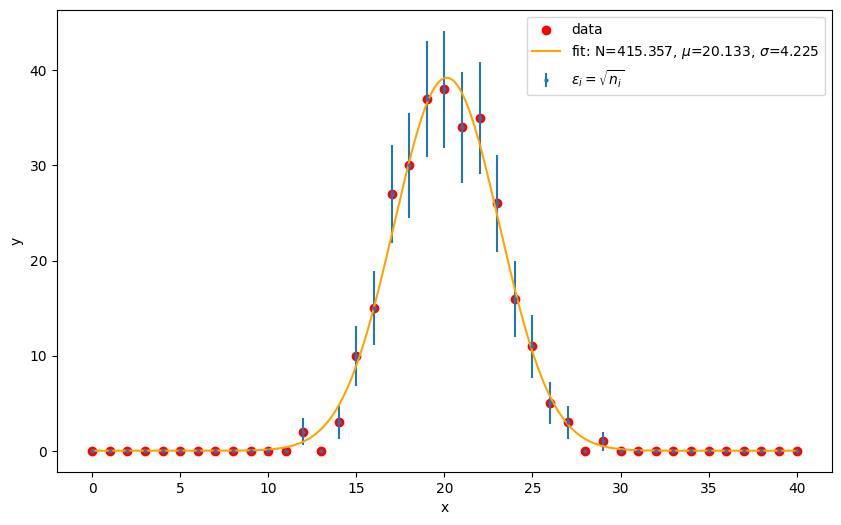

In [12]:
plt.figure(figsize=(10, 6), dpi=100)
plt.errorbar(x=xdata, y=ydata, fmt='o', markersize=2, yerr=sigmas, label=r'$\varepsilon_i=\sqrt{n_i}$')
plt.scatter(x=xdata, y=ydata, label='data', color='r')

popt, pcov = curve_fit(func, xdata[ydata>0], ydata[ydata>0], p0=[300, 10, 2], sigma=sigmas[ydata>0], absolute_sigma=True)
print(popt)
print(pcov)
print("N = {:.3f}+/-{:.3f}".format(popt[0],math.sqrt(pcov[0,0])))
print("mu = {:.3f}+/-{:.3f}".format(popt[1],math.sqrt(pcov[1,1])))
print("sigma = {:.3f}+/-{:.3f}".format(popt[2],math.sqrt(pcov[2,2])))

xs =np.linspace(xdata[0], xdata[-1], 2000)
plt.plot(xs, func(xs, *popt), color='orange',
         label=r'fit: N={:5.3f}, $\mu$={:5.3f}, $\sigma$={:5.3f}'.format(*popt))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()